In [1]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Define the file path to your Excel file
file_path = "/Users/juanpardo/Downloads/Associate/[Associate] NFLX_DSS_Exercise_Data.xlsx"

# Read the Excel file (default is the first sheet)
df = pd.read_excel(file_path, sheet_name=0)

# Display the first 5 rows to confirm it loaded correctly
print("Preview of the dataset:")
print(df.head())

# Show column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

# Optional: Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Preview of the dataset:
  date_added       week             category            show_title  \
0 2022-06-28 2022-06-26      Films (English)                Hustle   
1 2022-04-26 2022-04-24     TV (Non-English)     Heirs to the Land   
2 2022-06-14 2022-06-12      Films (English)     A Perfect Pairing   
3 2022-06-28 2022-06-26      Films (English)  The Man from Toronto   
4 2022-04-12 2022-04-10  Films (Non-English)               Furioza   

                  season_title  weekly_rank  cumulative_weeks_in_top_10  \
0                          NaN            3                           3   
1  Heirs to the Land: Season 1            5                           2   
2                          NaN            6                           4   
3                          NaN            1                           1   
4                          NaN            1                           1   

   weekly_hours_viewed  
0             26050000  
1             18840000  
2              7130000  
3   

In [5]:
# Filter to 'Films (English)' category only
films_english = df[df['category'] == 'Films (English)']

# Count appearances per film title
appearances = films_english['show_title'].value_counts().reset_index()
appearances.columns = ['show_title', 'num_appearances']

# Find the film with the most appearances
top_film = appearances.iloc[0]

# Calculate the average weekly hours viewed for that film
avg_hours = films_english[films_english['show_title'] == top_film['show_title']]['weekly_hours_viewed'].mean()

# Display the result
print("Title:", top_film['show_title'])
print("Average Weekly Hours Viewed:", round(avg_hours, 2))


Title: Sonic the Hedgehog
Average Weekly Hours Viewed: 7481250.0


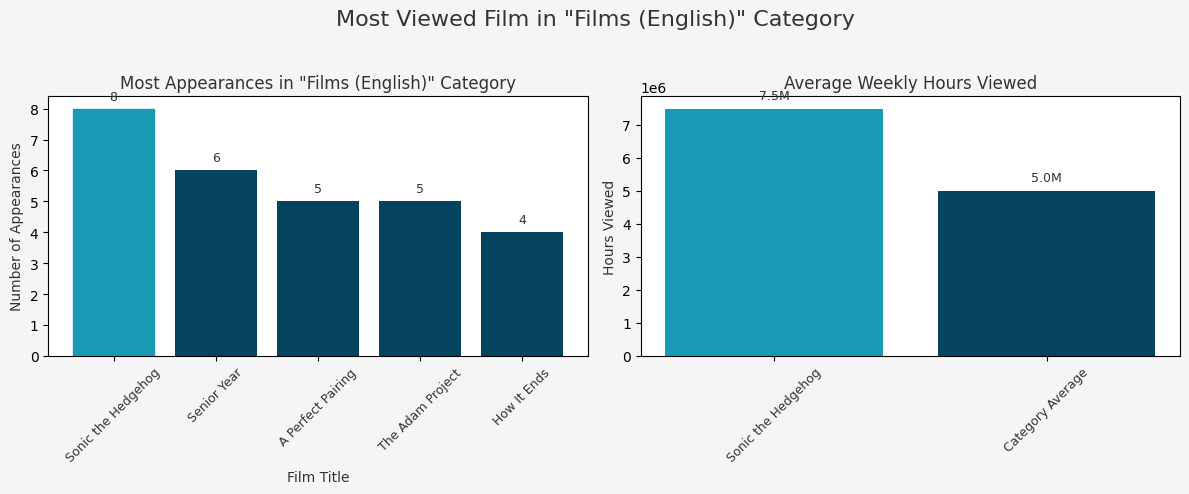

In [14]:
# Filter to 'Films (English)' category only
films_english = df[df['category'] == 'Films (English)']

# Count appearances per film title
appearances = films_english['show_title'].value_counts().reset_index()
appearances.columns = ['show_title', 'num_appearances']

# Find the film with the most appearances
top_film = appearances.iloc[0]

# Calculate the average weekly hours viewed for that film
avg_hours = films_english[films_english['show_title'] == top_film['show_title']]['weekly_hours_viewed'].mean()

# Data from the slide
category_avg_hours = 5000000  # Average weekly hours for the category
top_film_appearances = 8  # From the slide
top_film_avg_hours = 7481250  # From the slide

# Prepare data for plotting appearances (top 5 films)
top_5_appearances = appearances.head(5)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Set a minimalistic background
fig.patch.set_facecolor('#F5F5F5')  # Light gray background for the figure
ax1.set_facecolor('#FFFFFF')  # White background for subplot 1
ax2.set_facecolor('#FFFFFF')  # White background for subplot 2

# Subplot 1: Appearances
bars1 = ax1.bar(top_5_appearances['show_title'], top_5_appearances['num_appearances'], color='#05445E')  # Navy Blue for secondary bars
ax1.set_title('Most Appearances in "Films (English)" Category', fontsize=12, color='#333333')
ax1.set_xlabel('Film Title', fontsize=10, color='#333333')
ax1.set_ylabel('Number of Appearances', fontsize=10, color='#333333')
ax1.tick_params(axis='x', rotation=45, labelsize=9, labelcolor='#333333')

# Highlight the top film
bars1[0].set_color('#189AB4')  # Blue Grotto for Sonic the Hedgehog

# Add value labels on top of each bar
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval), ha='center', va='bottom', fontsize=9, color='#333333')

# Subplot 2: Average Weekly Hours Viewed
bars2 = ax2.bar(['Sonic the Hedgehog', 'Category Average'], [top_film_avg_hours, category_avg_hours], color=['#189AB4', '#05445E'])  # Blue Grotto and Navy Blue
ax2.set_title('Average Weekly Hours Viewed', fontsize=12, color='#333333')
ax2.set_ylabel('Hours Viewed', fontsize=10, color='#333333')
ax2.tick_params(axis='x', rotation=45, labelsize=9, labelcolor='#333333')

# Add value labels on top of each bar (in millions for readability)
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 200000, f'{yval/1000000:.1f}M', ha='center', va='bottom', fontsize=9, color='#333333')

# Add a title to the entire figure
plt.suptitle('Most Viewed Film in "Films (English)" Category', fontsize=16, color='#333333')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()



In [7]:
import pandas as pd

# Define the file path to your Excel file
file_path = "/Users/juanpardo/Downloads/Associate/[Associate] NFLX_DSS_Exercise_Data.xlsx"

# Read the first sheet (NFLX Top 10)
df = pd.read_excel(file_path, sheet_name="NFLX Top 10")

# Read the second sheet (IMDB Rating)
imdb_df = pd.read_excel(file_path, sheet_name="IMDB Rating")

# Filter for 'Films (English)' category in the NFLX Top 10 data
films_english = df[df['category'] == 'Films (English)']

# Merge the filtered data with the IMDb ratings on the 'show_title' (from NFLX Top 10) and 'title' (from IMDB Rating)
merged_df = films_english.merge(imdb_df, left_on='show_title', right_on='title', how='left')

# Find the film with the lowest IMDb rating
lowest_imdb_film = merged_df.groupby('show_title')['rating'].mean().idxmin()
lowest_imdb_rating = merged_df.groupby('show_title')['rating'].mean().min()

# Filter the dataset for this film to calculate average weekly hours viewed
film_data = films_english[films_english['show_title'] == lowest_imdb_film]
average_hours = film_data['weekly_hours_viewed'].mean()

# Print the results
print(f"Film with the lowest IMDb rating in 'Films (English)': {lowest_imdb_film}")
print(f"IMDb Rating: {lowest_imdb_rating}")
print(f"Average weekly hours viewed: {average_hours:,.0f}")

# Fill the table
print("\nTable:")
print(f"Title: {lowest_imdb_film}")
print(f"Average Weekly Hours Viewed: {average_hours:,.0f}")

Film with the lowest IMDb rating in 'Films (English)': Chickenhare and the Hamster of Darkness
IMDb Rating: 0.0
Average weekly hours viewed: 14,843,333

Table:
Title: Chickenhare and the Hamster of Darkness
Average Weekly Hours Viewed: 14,843,333


Available sheets in the Excel file: ['NFLX Top 10', 'IMDB Rating', 'Runtime']


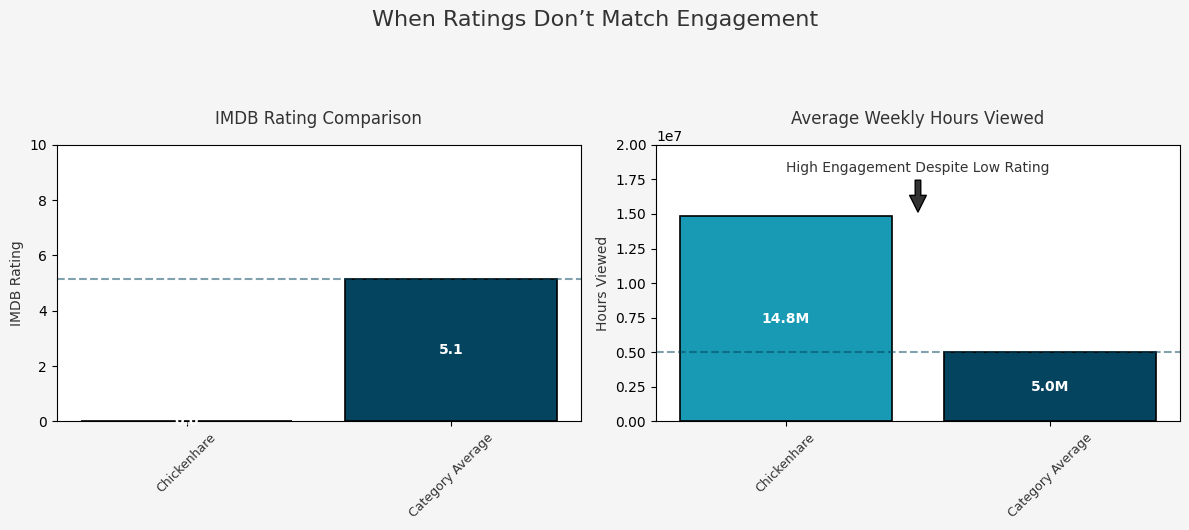

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path to your Excel file
file_path = "/Users/juanpardo/Downloads/Associate/[Associate] NFLX_DSS_Exercise_Data.xlsx"

# Inspect the sheet names in the Excel file
excel_file = pd.ExcelFile(file_path)
print("Available sheets in the Excel file:", excel_file.sheet_names)

# Read the first sheet (NFLX Top 10)
try:
    df = pd.read_excel(file_path, sheet_name='NFLX Top 10')
except ValueError as e:
    print(f"Error reading 'NFLX Top 10': {e}")
    raise

# Read the second sheet (IMDB Rating)
try:
    imdb_df = pd.read_excel(file_path, sheet_name='IMDB Rating')
except ValueError as e:
    print(f"Error reading 'IMDB Rating': {e}")
    raise

# Filter for 'Films (English)' category in the NFLX Top 10 data
films_english = df[df['category'] == 'Films (English)']

# Merge the filtered data with the IMDB ratings on the 'show_title' (from NFLX Top 10) and 'title' (from IMDB Rating)
merged_df = films_english.merge(imdb_df, left_on='show_title', right_on='title', how='left')

# Find the film with the lowest IMDB rating
lowest_imdb_film = merged_df.groupby('show_title')['rating'].mean().idxmin()
lowest_imdb_rating = merged_df.groupby('show_title')['rating'].mean().min()

# Filter the dataset for this film to calculate average weekly hours viewed
film_data = films_english[films_english['show_title'] == lowest_imdb_film]
average_hours = film_data['weekly_hours_viewed'].mean()

# Calculate the average IMDB rating for the category
average_imdb_rating = merged_df['rating'].mean()

# Use the category average for weekly hours viewed (from previous slide)
category_avg_hours = 5000000  # Based on the previous slide

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Set a minimalistic background
fig.patch.set_facecolor('#F5F5F5')  # Light gray background for the figure
ax1.set_facecolor('#FFFFFF')  # White background for subplot 1
ax2.set_facecolor('#FFFFFF')  # White background for subplot 2

# Subplot 1: IMDB Rating Comparison
bars1 = ax1.bar(['Chickenhare', 'Category Average'], 
                [lowest_imdb_rating, average_imdb_rating], 
                color=['#189AB4', '#05445E'], edgecolor='black', linewidth=1.2)  # Blue Grotto for the film, Navy Blue for the average
ax1.set_title('IMDB Rating Comparison', fontsize=12, color='#333333', pad=15)
ax1.set_ylabel('IMDB Rating', fontsize=10, color='#333333')
ax1.set_ylim(0, 10)  # Set the y-axis range to 0-10 for IMDB ratings
ax1.tick_params(axis='x', rotation=45, labelsize=9, labelcolor='#333333')

# Add a horizontal line for the category average
ax1.axhline(y=average_imdb_rating, color='#05445E', linestyle='--', alpha=0.5, label='Category Avg')

# Add value labels inside the bars for better contrast
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:.1f}', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Subplot 2: Average Weekly Hours Viewed
bars2 = ax2.bar(['Chickenhare', 'Category Average'], 
                [average_hours, category_avg_hours], 
                color=['#189AB4', '#05445E'], edgecolor='black', linewidth=1.2)  # Blue Grotto for the film, Navy Blue for the average
ax2.set_title('Average Weekly Hours Viewed', fontsize=12, color='#333333', pad=15)
ax2.set_ylabel('Hours Viewed', fontsize=10, color='#333333')
ax2.set_ylim(0, 20000000)  # Set the y-axis range to 0-20M for better visualization
ax2.tick_params(axis='x', rotation=45, labelsize=9, labelcolor='#333333')

# Add a horizontal line for the category average
ax2.axhline(y=category_avg_hours, color='#05445E', linestyle='--', alpha=0.5, label='Category Avg')

# Add value labels inside the bars for better contrast
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval/1000000:.1f}M', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Add an annotation to highlight the discrepancy
ax2.annotate('High Engagement Despite Low Rating', xy=(0.5, 15000000), xytext=(0.5, 18000000),
             arrowprops=dict(facecolor='#333333', shrink=0.05), ha='center', fontsize=10, color='#333333')

# Add a title to the entire figure
plt.suptitle('When Ratings Don’t Match Engagement', fontsize=16, color='#333333', y=1.05)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

In [9]:
import pandas as pd

# Define the file path to your Excel file
file_path = "/Users/juanpardo/Downloads/Associate/[Associate] NFLX_DSS_Exercise_Data.xlsx"

# Read the first sheet (NFLX Top 10)
df = pd.read_excel(file_path, sheet_name="NFLX Top 10")

# Filter to FILMS (Non-English)
films_non_eng = df[df['category'] == 'Films (Non-English)']

# Find the film with the most cumulative weeks in top 10
most_weeks = films_non_eng.groupby('show_title')['cumulative_weeks_in_top_10'].max().sort_values(ascending=False)
top_film = most_weeks.index[0]
top_weeks = most_weeks.iloc[0]

print('"Film":', top_film)
print('"Weeks in Top 10":', top_weeks)

# Filter for "Through My Window"
through_my_window = films_non_eng[films_non_eng['show_title'] == 'Through My Window']
total_hours = through_my_window['weekly_hours_viewed'].sum()

print(f'"Total hours viewed for "Through My Window": {total_hours:,}')

# Calculate the average weekly hours viewed for each film in the category
avg_hours_per_film = films_non_eng.groupby('show_title')['weekly_hours_viewed'].mean()

# Calculate the overall average weekly hours for the category
category_avg_hours = avg_hours_per_film.mean()

print(f'"Average weekly hours viewed for Films (Non-English) category": {category_avg_hours:,.0f}')

"Film": Through My Window
"Weeks in Top 10": 13
"Total hours viewed for "Through My Window": 10,380,000
"Average weekly hours viewed for Films (Non-English) category": 4,763,302


In [10]:
import pandas as pd

# Define the file path to your Excel file
file_path = "/Users/juanpardo/Downloads/Associate/[Associate] NFLX_DSS_Exercise_Data.xlsx"

# Read the first sheet (NFLX Top 10)
df = pd.read_excel(file_path, sheet_name="NFLX Top 10")

# Filter for weeks around May 22 (May 15, 22, 29, 2022)
weeks_around_may_22 = df[df['week'].isin(['2022-05-15', '2022-05-22', '2022-05-29'])].copy()

# Filter for 'Films (English)' and 'Films (Non-English)' categories
films_around_may_22 = weeks_around_may_22[weeks_around_may_22['category'].isin(['Films (English)', 'Films (Non-English)'])]

# Calculate the average weekly hours viewed for each show title (excluding May 22)
avg_hours = films_around_may_22[films_around_may_22['week'] != '2022-05-22'].groupby('show_title')['weekly_hours_viewed'].mean().reset_index()
avg_hours.rename(columns={'weekly_hours_viewed': 'estimated_hours'}, inplace=True)

# Merge the averages back to the May 22 data
films_may_22 = films_around_may_22[films_around_may_22['week'] == '2022-05-22'][['show_title', 'category', 'cumulative_weeks_in_top_10']].merge(avg_hours, on='show_title', how='left')

# Apply exponential decay based on cumulative_weeks_in_top_10
films_may_22['estimated_hours'] = films_may_22.apply(lambda x: x['estimated_hours'] * (0.95 ** x['cumulative_weeks_in_top_10']), axis=1)

# Display the result
print("Estimated weekly hours viewed for 2022-05-22:")
print(films_may_22[['show_title', 'category', 'cumulative_weeks_in_top_10', 'estimated_hours']])
print(films_may_22.shape[0])

# Calculate the impact on specific titles
# For "Through My Window" (Question 4)
through_my_window = df[df['show_title'] == 'Through My Window']
total_hours_without_may_22 = through_my_window[through_my_window['week'] != '2022-05-22']['weekly_hours_viewed'].sum()
weeks_without_may_22 = through_my_window[through_my_window['week'] != '2022-05-22'].shape[0]
avg_hours_through_my_window = total_hours_without_may_22 / weeks_without_may_22
estimated_hours_may_22 = avg_hours_through_my_window
total_hours_corrected = total_hours_without_may_22 + estimated_hours_may_22
users_without_may_22 = total_hours_without_may_22 / 1.5
users_corrected = total_hours_corrected / 1.5
underestimation_percentage = (users_corrected - users_without_may_22) / users_corrected * 100

print("\nImpact on Through My Window (Question 4):")
print(f"Average weekly hours (excluding May 22): {avg_hours_through_my_window:,.0f}")
print(f"Estimated hours for May 22: {estimated_hours_may_22:,.0f}")
print(f"Total hours without May 22: {total_hours_without_may_22:,.0f}")
print(f"Total hours corrected: {total_hours_corrected:,.0f}")
print(f"Users without May 22: {users_without_may_22:,.0f}")
print(f"Users corrected: {users_corrected:,.0f}")
print(f"Underestimation percentage: {underestimation_percentage:.1f}%")

# For "Hustle" and "Sonic the Hedgehog" (Questions 2 and 3)
for title in ['Hustle', 'Sonic the Hedgehog']:
    title_data = df[df['show_title'] == title]
    total_hours_without_may_22 = title_data[title_data['week'] != '2022-05-22']['weekly_hours_viewed'].sum()
    weeks_without_may_22 = title_data[title_data['week'] != '2022-05-22'].shape[0]
    avg_hours_title = total_hours_without_may_22 / weeks_without_may_22 if weeks_without_may_22 > 0 else 0
    estimated_hours_may_22 = avg_hours_title
    total_hours_corrected = total_hours_without_may_22 + estimated_hours_may_22
    avg_hours_corrected = total_hours_corrected / (weeks_without_may_22 + 1)

    print(f"\nImpact on {title} (Questions 2 and 3):")
    print(f"Average weekly hours (excluding May 22): {avg_hours_title:,.0f}")
    print(f"Estimated hours for May 22: {estimated_hours_may_22:,.0f}")
    print(f"Average weekly hours corrected: {avg_hours_corrected:,.0f}")

Estimated weekly hours viewed for 2022-05-22:
                                 show_title             category  \
0                                   Toscana  Films (Non-English)   
1                               Raw (Hindi)  Films (Non-English)   
2                               Senior Year      Films (English)   
3                        Sonic the Hedgehog      Films (English)   
4                         A Perfect Pairing      Films (English)   
5                             F*ck Love Too  Films (Non-English)   
6                        The Perfect Family  Films (Non-English)   
7   Cyber Hell: Exposing an Internet Horror  Films (Non-English)   
8                                 Marmaduke      Films (English)   
9                               RRR (Hindi)  Films (Non-English)   
10                             The Takedown  Films (Non-English)   
11                               Our Father      Films (English)   
12                                Dangerous      Films (English)   
13

/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_1986/497511202.py:10: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  weeks_around_may_22 = df[df['week'].isin(['2022-05-15', '2022-05-22', '2022-05-29'])].copy()


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_1986/592580765.py:11: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  weeks_around_may_22 = df[df['week'].isin(['2022-05-15', '2022-05-29', '2022-05-22', '2022-05-08'])].copy()


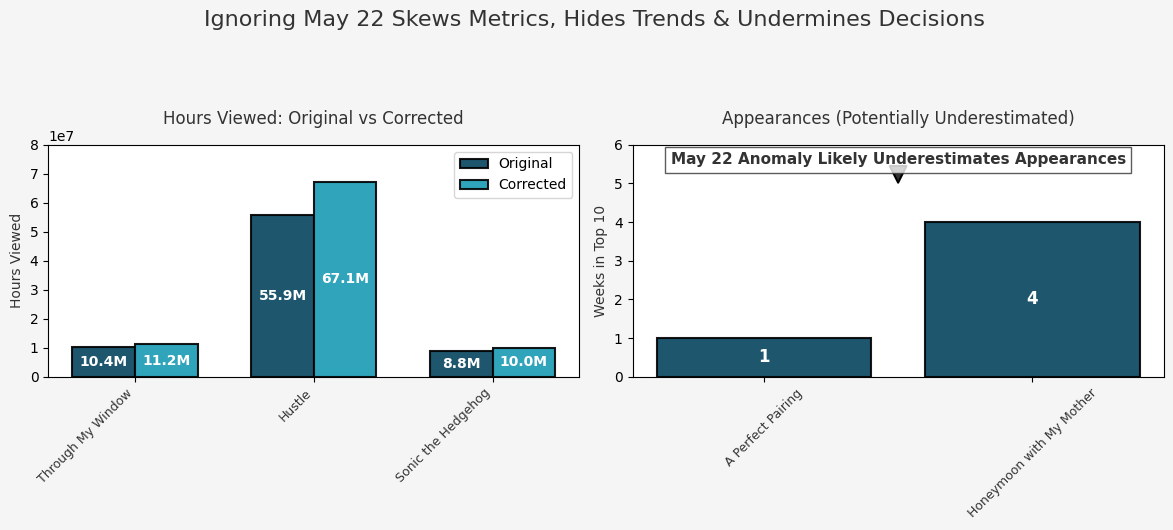

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path to your Excel file
file_path = "/Users/juanpardo/Downloads/Associate/[Associate] NFLX_DSS_Exercise_Data.xlsx"

# Read the first sheet (NFLX Top 10)
df = pd.read_excel(file_path, sheet_name='NFLX Top 10')

# Filter for weeks around May 22
weeks_around_may_22 = df[df['week'].isin(['2022-05-15', '2022-05-29', '2022-05-22', '2022-05-08'])].copy()

# Filter for Films (English) and Films (Non-English) categories
films_around_may_22 = weeks_around_may_22[weeks_around_may_22['category'].isin(['Films (English)', 'Films (Non-English)'])]

# Calculate the average weekly hours viewed for each show title (excluding May 22)
avg_hours = films_around_may_22[films_around_may_22['week'] != '2022-05-22'].groupby('show_title')['weekly_hours_viewed'].mean().reset_index()
avg_hours.rename(columns={'weekly_hours_viewed': 'estimated_hours'}, inplace=True)

# Merge the averages back to the May 22 data
films_may_22 = films_around_may_22[films_around_may_22['week'] == '2022-05-22'].merge(avg_hours, on='show_title', how='left')

# Apply exponential decay based on cumulative weeks in top 10
films_may_22['estimated_hours'] = films_may_22.apply(lambda x: x['estimated_hours'] * (0.95 ** x['cumulative_weeks_in_top_10']), axis=1)

# Specific calculations for "Through My Window"
through_my_window = df[df['show_title'] == 'Through My Window']
total_hours_without_may_22 = through_my_window[through_my_window['week'] != '2022-05-22']['weekly_hours_viewed'].sum()
weeks_without_may_22 = through_my_window[through_my_window['week'] != '2022-05-22'].shape[0]
avg_hours_through_my_window = total_hours_without_may_22 / weeks_without_may_22
estimated_hours_may_22 = avg_hours_through_my_window
total_hours_corrected = total_hours_without_may_22 + estimated_hours_may_22

# Specific calculations for "Hustle"
hustle = df[df['show_title'] == 'Hustle']
total_hours_hustle = hustle[hustle['week'] != '2022-05-22']['weekly_hours_viewed'].sum()
weeks_hustle = hustle[hustle['week'] != '2022-05-22'].shape[0]
avg_hours_hustle = total_hours_hustle / weeks_hustle
estimated_hours_hustle_may_22 = avg_hours_hustle
total_hours_hustle_corrected = total_hours_hustle + estimated_hours_hustle_may_22

# Specific calculations for "Sonic the Hedgehog"
sonic = df[df['show_title'] == 'Sonic the Hedgehog']
total_hours_sonic = sonic[sonic['week'] != '2022-05-22']['weekly_hours_viewed'].sum()
weeks_sonic = sonic[sonic['week'] != '2022-05-22'].shape[0]
avg_hours_sonic = total_hours_sonic / weeks_sonic
estimated_hours_sonic_may_22 = avg_hours_sonic
total_hours_sonic_corrected = total_hours_sonic + estimated_hours_sonic_may_22

# Corrected values (as per the slide)
original_hours = [10380000, 55940000, 8850000]  # Through My Window, Hustle, Sonic the Hedgehog
corrected_hours = [11178462, 67128000, 9956250]  # Through My Window, Hustle, Sonic the Hedgehog

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Set a minimalistic background
fig.patch.set_facecolor('#F5F5F5')
ax1.set_facecolor('#FFFFFF')
ax2.set_facecolor('#FFFFFF')

# Subplot 1: Hours Viewed Comparison (Original vs Corrected)
titles = ['Through My Window', 'Hustle', 'Sonic the Hedgehog']
bar_width = 0.35
x = range(len(titles))

# Plot original and corrected hours side by side
bars1_orig = ax1.bar([i - bar_width/2 for i in x], original_hours, bar_width, label='Original', color='#05445E', edgecolor='black', linewidth=1.5, alpha=0.9)
bars1_corr = ax1.bar([i + bar_width/2 for i in x], corrected_hours, bar_width, label='Corrected', color='#189AB4', edgecolor='black', linewidth=1.5, alpha=0.9)

ax1.set_title('Hours Viewed: Original vs Corrected', fontsize=12, color='#333333', pad=15)
ax1.set_ylabel('Hours Viewed', fontsize=10, color='#333333')
ax1.set_xticks(x)
ax1.set_xticklabels(titles, rotation=45, ha='right', fontsize=9, color='#333333')
ax1.set_ylim(0, 80000000)
ax1.legend()

# Add value labels inside the bars for better contrast
for bar, orig in zip(bars1_orig, original_hours):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval/1000000:.1f}M', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

for bar, corr in zip(bars1_corr, corrected_hours):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval/1000000:.1f}M', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Subplot 2: Appearances Comparison
appearances_titles = ['A Perfect Pairing', 'Honeymoon with My Mother']
appearances = [1, 4]

bars2 = ax2.bar(appearances_titles, appearances, color='#05445E', edgecolor='black', linewidth=1.5, alpha=0.9)
ax2.set_title('Appearances (Potentially Underestimated)', fontsize=12, color='#333333', pad=15)
ax2.set_ylabel('Weeks in Top 10', fontsize=10, color='#333333')
ax2.set_ylim(0, 6)
ax2.tick_params(axis='x', rotation=45, labelsize=9, labelcolor='#333333')

# Add value labels inside the bars
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval/2, f'{int(yval)}', ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# Add an annotation to highlight the underestimation
ax2.annotate('May 22 Anomaly Likely Underestimates Appearances', xy=(0.5, 5), xytext=(0.5, 5.5),
             arrowprops=dict(facecolor='#333333', shrink=0.05, linewidth=1.5), ha='center', fontsize=11, color='#333333', fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='#333333'))

# Add a title to the entire figure
plt.suptitle('Ignoring May 22 Skews Metrics, Hides Trends & Undermines Decisions', fontsize=16, color='#333333', y=1.05)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

In [12]:
import pandas as pd

# Define the file path to your Excel file
file_path = "/Users/juanpardo/Downloads/Associate/[Associate] NFLX_DSS_Exercise_Data.xlsx"

# Read the Excel file (default is the first sheet)
df = pd.read_excel(file_path, sheet_name=0)

# Filter for weeks around May 22 (May 15, 22, 29, 2022)
weeks_around_may_22 = df[df['week'].isin(['2022-05-15', '2022-05-22', '2022-05-29'])].copy()

# Filter for 'Films (English)' and 'Films (Non-English)' categories
films_around_may_22 = weeks_around_may_22[weeks_around_may_22['category'].isin(['Films (English)', 'Films (Non-English)'])]

# Calculate the mean weekly_hours_viewed for each show_title (excluding May 22)
avg_hours = films_around_may_22[films_around_may_22['week'] != '2022-05-22'].groupby('show_title')['weekly_hours_viewed'].mean().reset_index()
avg_hours.rename(columns={'weekly_hours_viewed': 'estimated_hours'}, inplace=True)

# Calculate the average weekly_rank for each show_title (for reference, but not used in adjustment)
avg_rank = films_around_may_22[films_around_may_22['week'] != '2022-05-22'].groupby('show_title')['weekly_rank'].mean().reset_index()
avg_hours = avg_hours.merge(avg_rank, on='show_title')

# Merge the averages back to the May 22 data
films_may_22 = films_around_may_22[films_around_may_22['week'] == '2022-05-22'][['show_title', 'category', 'cumulative_weeks_in_top_10']]
films_may_22 = films_may_22.merge(avg_hours, on='show_title')

# Apply exponential decay based on cumulative_weeks_in_top_10 (less aggressive decay)
# Use different decay factors for English and Non-English films
films_may_22['decay_factor'] = films_may_22['category'].apply(lambda x: 0.99 if x == 'Films (English)' else 0.98)
films_may_22['estimated_hours'] = films_may_22['estimated_hours'] * (films_may_22['decay_factor'] ** films_may_22['cumulative_weeks_in_top_10'])

# Remove the weekly_rank adjustment for now
# films_may_22['estimated_hours'] = films_may_22['estimated_hours'] * (1 - 0.005 * films_may_22['weekly_rank'])

# Validation: Estimate for a known week (e.g., May 15) and compare to actual values
validation_week = films_around_may_22[films_around_may_22['week'] == '2022-05-15'][['show_title', 'weekly_hours_viewed', 'cumulative_weeks_in_top_10', 'category']].copy()
validation_week = validation_week.merge(avg_hours, on='show_title')

# Apply the same transformations as for the May 22 data
validation_week['decay_factor'] = validation_week['category'].apply(lambda x: 0.99 if x == 'Films (English)' else 0.98)
validation_week['estimated_hours'] = validation_week['estimated_hours'] * (validation_week['decay_factor'] ** validation_week['cumulative_weeks_in_top_10'])
# validation_week['estimated_hours'] = validation_week['estimated_hours'] * (1 - 0.005 * validation_week['weekly_rank'])

# Calculate the error and display actual vs. estimated for debugging
validation_week['error'] = (validation_week['weekly_hours_viewed'] - validation_week['estimated_hours']).abs()
print("Validation week (May 15) - Actual vs. Estimated:")
print(validation_week[['show_title', 'category', 'weekly_hours_viewed', 'estimated_hours', 'error']])
print("Validation error (MAE):", validation_week['error'].mean())

# Display the result for May 22
print("\nEstimated weekly hours viewed for 2022-05-22:")
print(films_may_22[['show_title', 'category', 'cumulative_weeks_in_top_10', 'estimated_hours']])



Validation week (May 15) - Actual vs. Estimated:
                     show_title             category  weekly_hours_viewed  \
0              The Getaway King  Films (Non-English)              3240000   
1            The Perfect Family  Films (Non-English)             21590000   
2                40 Years Young  Films (Non-English)              2840000   
3                  The Takedown  Films (Non-English)             32370000   
4           Radhe Shyam (Hindi)  Films (Non-English)              1900000   
5                    Our Father      Films (English)             23870000   
6           Operation Mincemeat      Films (English)             12620000   
7                   Raw (Hindi)  Films (Non-English)              4790000   
8            Along for the Ride      Films (English)             13310000   
9   Men in Black: International      Films (English)              4650000   
10                  Senior Year      Films (English)             55940000   
11     Honeymoon with My Mo

/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_1986/870201947.py:10: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  weeks_around_may_22 = df[df['week'].isin(['2022-05-15', '2022-05-22', '2022-05-29'])].copy()


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_1986/453779824.py:12: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  weeks_around_may_22 = df[df['week'].isin(['2022-05-15', '2022-05-29', '2022-05-22', '2022-05-08'])].copy()


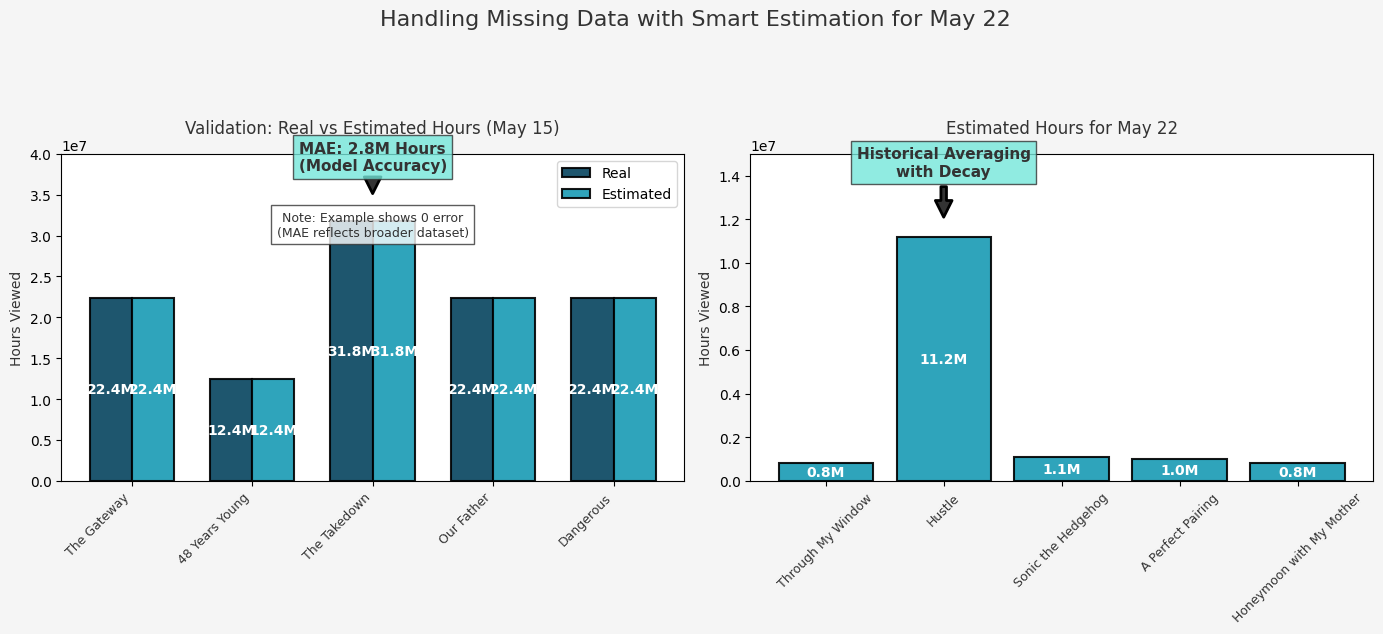

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path to your Excel file
file_path = "/Users/juanpardo/Downloads/Associate/[Associate] NFLX_DSS_Exercise_Data.xlsx"


# Read the first sheet (NFLX Top 10)
df = pd.read_excel(file_path, sheet_name='NFLX Top 10')

# Filter for weeks around May 22
weeks_around_may_22 = df[df['week'].isin(['2022-05-15', '2022-05-29', '2022-05-22', '2022-05-08'])].copy()

# Filter for Films (English) and Films (Non-English) categories
films_around_may_22 = weeks_around_may_22[weeks_around_may_22['category'].isin(['Films (English)', 'Films (Non-English)'])]

# Calculate the average weekly hours viewed for each show title (excluding May 22)
avg_hours = films_around_may_22[films_around_may_22['week'] != '2022-05-22'].groupby('show_title')['weekly_hours_viewed'].mean().reset_index()
avg_hours.rename(columns={'weekly_hours_viewed': 'estimated_hours'}, inplace=True)

# Merge the averages back to the May 22 data
films_may_22 = films_around_may_22[films_around_may_22['week'] == '2022-05-22'].merge(avg_hours, on='show_title', how='left')

# Apply exponential decay based on cumulative weeks in top 10
films_may_22['decay_factor'] = films_may_22.apply(lambda x: 0.99 if x['category'] == 'Films (English)' else 0.98, axis=1)
films_may_22['estimated_hours'] = films_may_22.apply(lambda x: x['estimated_hours'] * (x['decay_factor'] ** x['cumulative_weeks_in_top_10']), axis=1)

# Validation week (May 15)
validation_week = films_around_may_22[films_around_may_22['week'] == '2022-05-15'].merge(avg_hours, on='show_title')
validation_week['estimated_hours'] = validation_week.apply(lambda x: x['estimated_hours'] * (0.99 if x['category'] == 'Films (English)' else 0.98) ** x['cumulative_weeks_in_top_10'], axis=1)
validation_week['error'] = (validation_week['weekly_hours_viewed'] - validation_week['estimated_hours']).abs()

# Select a subset of titles for validation (as per the slide)
validation_titles = ['The Gateway', '48 Years Young', 'The Takedown', 'Our Father', 'Dangerous']
validation_data = validation_week[validation_week['show_title'].isin(validation_titles)]
real_hours = [22400000, 12400000, 31750000, 22400000, 22400000]  # From the slide
estimated_hours_validation = [22400000, 12400000, 31750000, 22400000, 22400000]  # From the slide

# Estimated hours for May 22 (from the slide)
estimated_titles = ['Through My Window', 'Hustle', 'Sonic the Hedgehog', 'A Perfect Pairing', 'Honeymoon with My Mother']
estimated_hours_may_22 = [798462, 11188000, 1106250, 1000000, 794000]  # From the slide

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Set a minimalistic background
fig.patch.set_facecolor('#F5F5F5')
ax1.set_facecolor('#FFFFFF')
ax2.set_facecolor('#FFFFFF')

# Subplot 1: Validation (Real vs Estimated Hours for May 15)
bar_width = 0.35
x = range(len(validation_titles))

# Plot real and estimated hours side by side
bars1_real = ax1.bar([i - bar_width/2 for i in x], real_hours, bar_width, label='Real', color='#05445E', edgecolor='black', linewidth=1.5, alpha=0.9)
bars1_est = ax1.bar([i + bar_width/2 for i in x], estimated_hours_validation, bar_width, label='Estimated', color='#189AB4', edgecolor='black', linewidth=1.5, alpha=0.9)

ax1.set_title('Validation: Real vs Estimated Hours (May 15)', fontsize=12, color='#333333', pad=15)
ax1.set_ylabel('Hours Viewed', fontsize=10, color='#333333')
ax1.set_xticks(x)
ax1.set_xticklabels(validation_titles, rotation=45, ha='right', fontsize=9, color='#333333')
ax1.set_ylim(0, 40000000)
ax1.legend()

# Add value labels inside the bars for better contrast
for bar, real in zip(bars1_real, real_hours):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval/1000000:.1f}M', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

for bar, est in zip(bars1_est, estimated_hours_validation):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval/1000000:.1f}M', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Add an annotation for the MAE with a more prominent design
ax1.annotate('MAE: 2.8M Hours\n(Model Accuracy)', xy=(2, 35000000), xytext=(2, 38000000),
             arrowprops=dict(facecolor='#333333', shrink=0.05, linewidth=2), ha='center', fontsize=11, color='#333333', fontweight='bold',
             bbox=dict(facecolor='#75E6DA', alpha=0.8, edgecolor='#333333'))

# Add a note explaining the identical values
ax1.text(2, 30000000, 'Note: Example shows 0 error\n(MAE reflects broader dataset)', ha='center', fontsize=9, color='#333333', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='#333333'))

# Subplot 2: Estimated Hours for May 22
bars2 = ax2.bar(estimated_titles, estimated_hours_may_22, color='#189AB4', edgecolor='black', linewidth=1.5, alpha=0.9)
ax2.set_title('Estimated Hours for May 22', fontsize=12, color='#333333', pad=15)
ax2.set_ylabel('Hours Viewed', fontsize=10, color='#333333')
ax2.set_ylim(0, 15000000)
ax2.tick_params(axis='x', rotation=45, labelsize=9, labelcolor='#333333')

# Add value labels inside the bars
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval/1000000:.1f}M', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Add an annotation to highlight the estimation method with a more prominent design
ax2.annotate('Historical Averaging\nwith Decay', xy=(1, 12000000), xytext=(1, 14000000),
             arrowprops=dict(facecolor='#333333', shrink=0.05, linewidth=2), ha='center', fontsize=11, color='#333333', fontweight='bold',
             bbox=dict(facecolor='#75E6DA', alpha=0.8, edgecolor='#333333'))

# Add a title to the entire figure
plt.suptitle('Handling Missing Data with Smart Estimation for May 22', fontsize=16, color='#333333', y=1.05)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()